In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joypy
import helper_functions
from matplotlib.lines import Line2D

helper = helper_functions.HelperFunctions()

sns.set_palette("viridis")

In [2]:
data_path = 'C:/Users/Arkady/Google Drive/data/beyond_the_reach'
figure_path = 'C:/Users/Arkady/Dropbox/Research/Journal papers/2018 Beyond the reach/figures'

figure_format = '.png'

index=['subj_id', 'task', 'trial_no']

choices = pd.read_csv(os.path.join(data_path, 'choices_processed.txt'))
dynamics = pd.read_csv(os.path.join(data_path, 'dynamics_processed.txt'))

choices = choices.set_index(index, drop=False)
dynamics = dynamics.set_index(index, drop=False)

dynamics = dynamics.join(choices.option_chosen)

# dynamics = dynamics[choices.is_staircase]
# choices = choices[choices.is_staircase]

choices['Delta_q'] = choices.groupby(['task', 'option_chosen'])['Delta'].transform(
                     lambda x: pd.qcut(x, q=3, labels=['Low', 'Medium', 'High']))


# choices['Lambda_q'] = choices.groupby(['task', 'option_chosen'])['Lambda'].transform(
#                      lambda x: pd.qcut(x, q=3, labels=['Low', 'Medium', 'High']))

# choices['Lambda_q'] = pd.qcut(choices.Lambda, q=3, labels=['Low', 'Medium', 'High'])

# choices['Delta'] = abs(choices['Delta'])
# choices['Delta_q'] = pd.qcut(choices.Delta, q=2, labels=['Low', 'High'])
# choices['Delta_sign'] = np.sign(choices.Delta)

dynamics['Lambda_q'] = choices['Lambda_q']
dynamics['Delta_q'] = choices['Delta_q']

C:\Users\Arkady\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 'task' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version


In [7]:
dynamics_walking = dynamics.loc[dynamics.task=='walking', :]
dynamics_mouse = dynamics.loc[dynamics.task=='mouse', :]

choices_walking = choices.loc[choices.task=='walking', :]
choices_mouse = choices.loc[choices.task=='mouse', :]

# Mean trajectories

In [154]:
def get_average_trajectories(dynamics, variables):
    cols = dynamics.index.names + variables    
    dynamics_transposed = dynamics.groupby(by = cols). \
                    apply(lambda x: x.loc[:, ['x', 'y']].reset_index(drop=True).T)
    cols += ['x/y']
    dynamics_transposed.index.names = cols
    
    subj_mean_traj = dynamics_transposed.groupby(level=variables + ['x/y']).apply(np.mean).stack()
    
    subj_mean_traj.index.names = variables + ['x/y', 't']
    subj_mean_traj = subj_mean_traj.unstack('x/y')
    return subj_mean_traj

mean_traj_walking = get_average_trajectories(dynamics_walking, ['option_chosen', 'Delta_q'])
mean_traj_mouse = get_average_trajectories(dynamics_mouse, ['option_chosen', 'Delta_q'])

mean_traj_walking_no_com = get_average_trajectories(dynamics_walking[~choices_walking.is_com], ['option_chosen', 'Delta_q'])
mean_traj_mouse_no_com = get_average_trajectories(dynamics_mouse[~choices_mouse.is_com], ['option_chosen', 'Delta_q'])

C:\Users\Arkady\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'subj_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Arkady\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'task' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Arkady\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'trial_no' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Arkady\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key 

In [155]:
def plot_mean_trajectories(mean_trajectories, var='Lambda_q'):
    fig, ax = plt.subplots(1, figsize=(10, 10))
    plt.set_cmap('viridis')
    ax.set_aspect(1, adjustable='datalim')
    colors = {'Low': 'C0',
              'Medium': 'C3',
              'High': 'C5'}
    
    for name, group in mean_trajectories.groupby(['option_chosen', var]):
        ax.plot(mean_trajectories.loc[name].x, mean_trajectories.loc[name].y, 
                lw=4, color=colors[name[1]])
    ax.text(s='Larger \nbut later', x=0.85, y=1.05, fontsize=26, 
            horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(s='Smaller \nbut sooner', x=0.15, y=1.05, fontsize=26, 
            horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    
    ax.tick_params(axis='both', which='major', labelsize=24)

    custom_lines = [Line2D([0], [0], color='C0', lw=4),
                    Line2D([0], [0], color='C3', lw=4),
                    Line2D([0], [0], color='C5', lw=4)]

    ax.legend(custom_lines, ['Low $\Delta$', 'Medium $\Delta$', 'High $\Delta$'], fontsize=26, loc=5)
#     ax.legend()

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


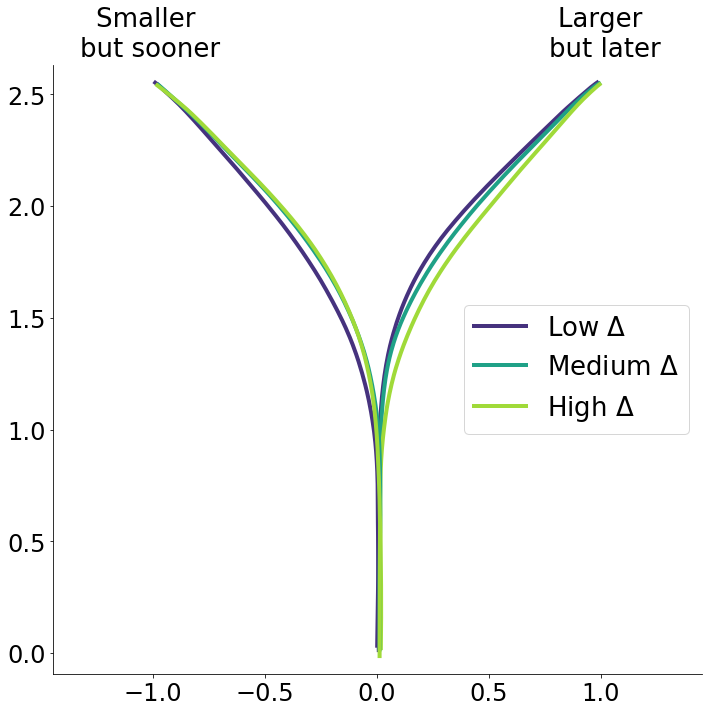

In [156]:
plot_mean_trajectories(mean_traj_walking, var='Delta_q')
plt.savefig(os.path.join(figure_path, 'mean_traj_walking'+figure_format))

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


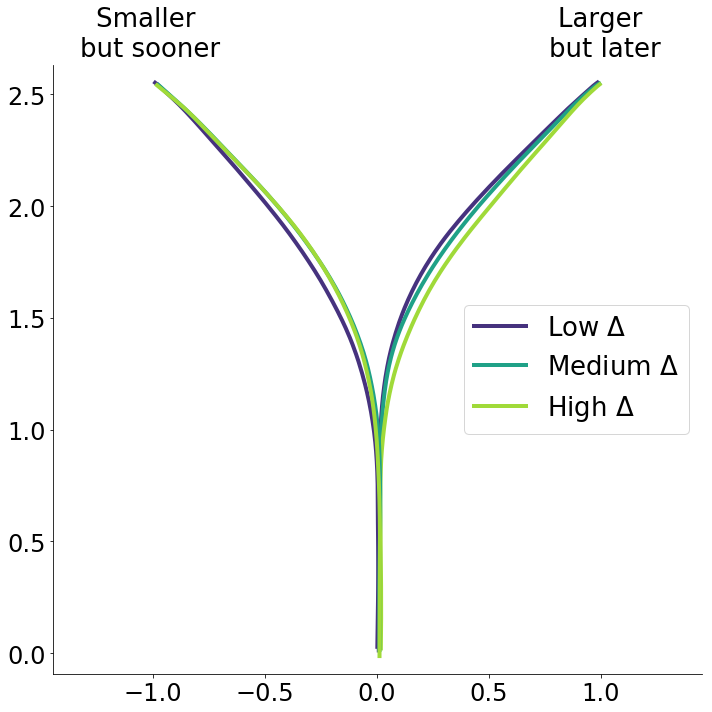

In [157]:
plot_mean_trajectories(mean_traj_walking_no_com, var='Delta_q')
plt.savefig(os.path.join(figure_path, 'mean_traj_walking_no_com'+figure_format))

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


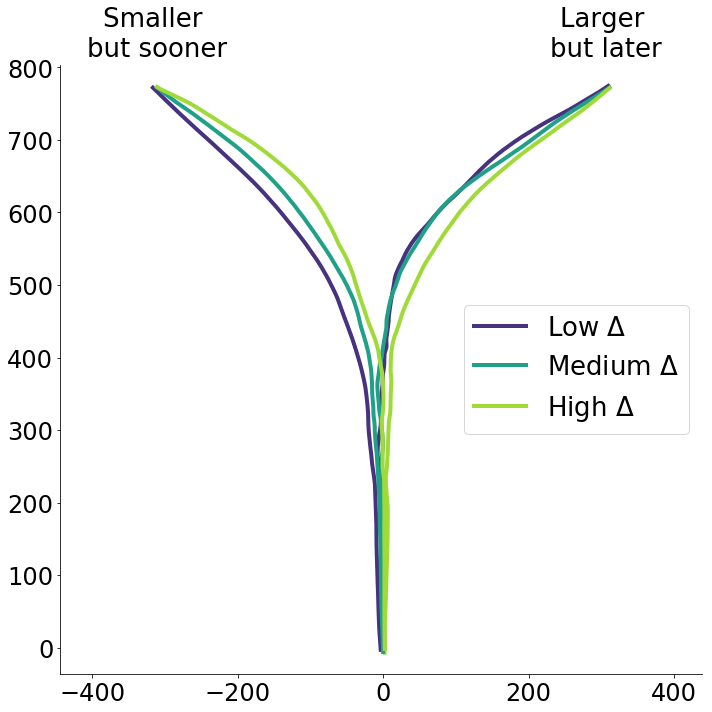

In [158]:
plot_mean_trajectories(mean_traj_mouse, var='Delta_q')
plt.savefig(os.path.join(figure_path, 'mean_traj_mouse'+figure_format))

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


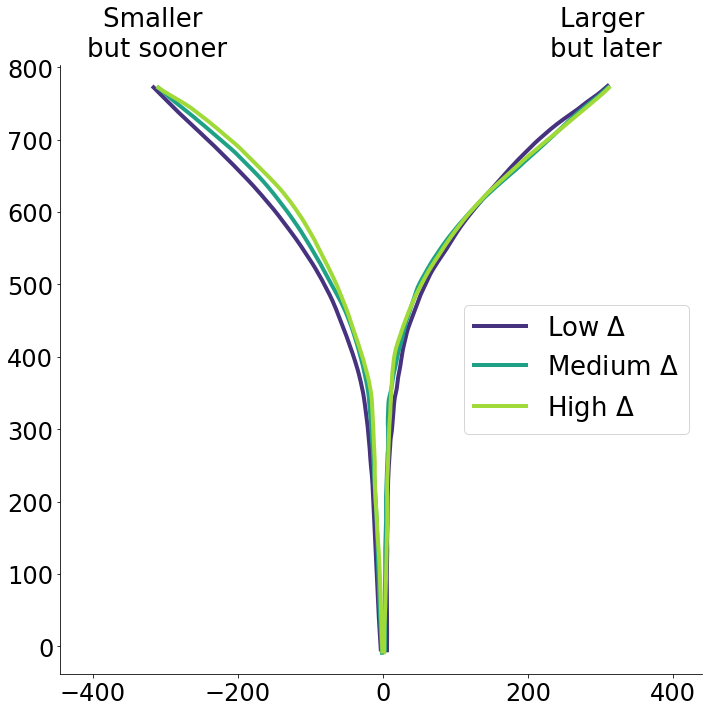

In [159]:
plot_mean_trajectories(mean_traj_mouse_no_com, var='Delta_q')
plt.savefig(os.path.join(figure_path, 'mean_traj_mouse_no_com'+figure_format))

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


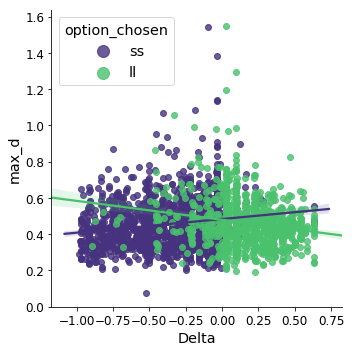

In [161]:
sns.lmplot(data=choices_walking, x='Delta', y='max_d', hue='option_chosen', palette=dict(ss="C0", ll="C4"), legend_out=False)

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


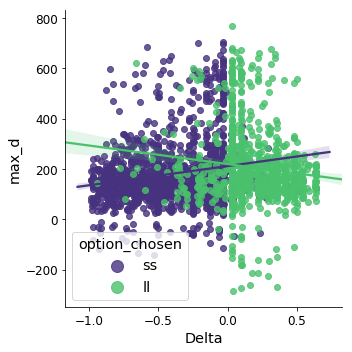

In [162]:
sns.lmplot(data=choices_mouse, x='Delta', y='max_d', hue='option_chosen', palette=dict(ss="C0", ll="C4"), legend_out=False)

# Categorical plots

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


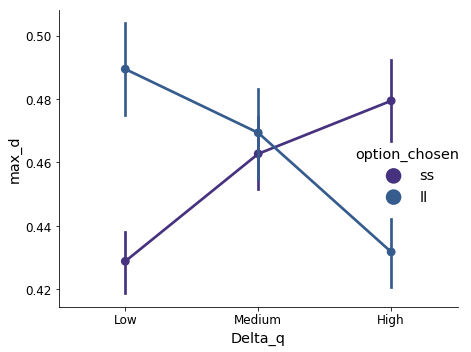

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


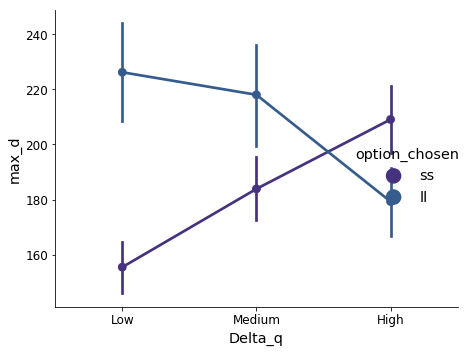

In [163]:
sns.catplot(data=choices_walking, x='Delta_q', y='max_d', hue='option_chosen', kind='point')
sns.catplot(data=choices_mouse, x='Delta_q', y='max_d', hue='option_chosen', kind='point')

# Posterior plots

In [190]:
max_d_mouse_posterior = pd.read_csv("csv/posterior_mouse_max_d.csv")

TODO: Plot b_Lambda:option_chosenll and b_Lambda:option_chosenss in different colors

In [208]:
df = max_d_mouse_posterior.filter(regex=('b_Lambda:option_chosen.*')).stack().reset_index()

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


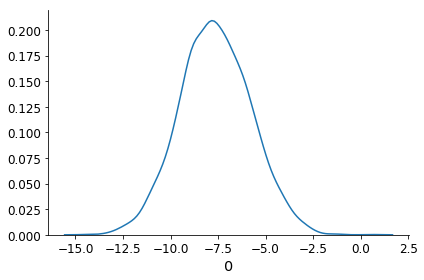

In [218]:
df = max_d_mouse_posterior.filter(regex=('b_Lambda:option_chosen.*')).stack().reset_index()

fig, ax = plt.subplots(1)
sns.distplot(df.loc[df.level_1 == 'b_Lambda:option_chosenll', 0], hist=False)

# joypy.joyplot(df, by='level_1', column=0);

In [53]:
k_values, ip_values = helper.get_k_values(choices, log=False)

D:\source\beyond_the_reach\data_analysis\helper_functions.py:55: FutureWarning: 'subj_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  indiff_points = (choices_sc.groupby(['subj_id', 'task', 'll_delay'])
D:\source\beyond_the_reach\data_analysis\helper_functions.py:55: FutureWarning: 'task' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  indiff_points = (choices_sc.groupby(['subj_id', 'task', 'll_delay'])


In [54]:
ip_values

,subj_id,task,ll_delay,indiff_point
0,1322,mouse,7,0.84375
1,1322,mouse,30,0.68750
2,1322,mouse,183,0.00000
3,1322,mouse,365,0.00000
4,1322,mouse,1095,0.00000
5,1322,walking,7,1.00000
6,1322,walking,30,0.90625
7,1322,walking,183,0.00000
8,1322,walking,365,0.00000
9,1322,walking,1095,0.00000
